In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px
import plotly.graph_objects as go 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
user_data = pd.read_csv('../data/user_data.csv')
typing_data = pd.read_csv('../data/typing_data.csv')
big_data = pd.merge(typing_data, user_data, on='id', how='inner')

In [3]:
big_data.head()

,id,date,time,hand,hold_time,direction,latency,flight_time,Age,Gender,...,Tremors,SinceDiagnosis,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other,Medicated
0,NMMGWRY6SO,170301,08:45:42.125,L,187.5,LL,421.9,281.3,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
1,NMMGWRY6SO,170301,08:45:42.422,L,203.1,LL,281.3,93.8,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
2,NMMGWRY6SO,170301,08:48:29.031,L,203.1,LL,296.9,125.0,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
3,NMMGWRY6SO,170301,08:48:29.266,L,218.8,LL,218.8,15.6,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
4,NMMGWRY6SO,170301,08:48:29.484,R,187.5,LR,250.0,31.3,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False


In [5]:
medicated = big_data.query("Medicated == True")
not_medicated = big_data.query("Parkinsons == True and Medicated == False")
control = big_data.query("Parkinsons == False")

med_stats = medicated[['flight_time', 'latency', 'hold_time']].mean()
unmed_stats = not_medicated[['flight_time', 'latency', 'hold_time']].mean()
control_stats = control[['flight_time', 'latency', 'hold_time']].mean()

medicated_dataframe = pd.concat([med_stats, unmed_stats, control_stats], axis=1)
medicated_dataframe.columns = ['Medicated', 'Unmedicated', 'Control']
medicated_dataframe.head()

,Medicated,Unmedicated,Control
flight_time,210.855986,166.401943,176.512399
latency,283.965426,240.504995,250.504971
hold_time,128.344779,103.706316,100.305339


In [6]:
fig = px.bar(medicated_dataframe.T, title='Mean Typing Delay by Medicaiton Status')
fig.update_layout(xaxis_title='Medication Status', yaxis_title='Mean Typing Delay (ms)')
fig.show()

In [7]:
no_impact = big_data.query("Impact == 0")
low = big_data.query("Impact == 1")
medium = big_data.query("Impact == 2")
high = big_data.query("Impact == 3")

no_impact = no_impact[['flight_time', 'latency', 'hold_time']].mean()
low = low[['flight_time', 'latency', 'hold_time']].mean()
medium = medium[['flight_time', 'latency', 'hold_time']].mean()
high = high[['flight_time', 'latency', 'hold_time']].mean()

impact_df = pd.concat([no_impact, low, medium, high], axis=1)
impact_df.columns = ['no impact', 'low impact', 'medium impact', 'high impact']
impact_df

,no impact,low impact,medium impact,high impact
flight_time,176.462496,204.021215,168.909723,261.807586
latency,250.592749,290.070986,228.726707,367.247641
hold_time,102.310082,124.249223,107.908519,133.992147


In [8]:
fig = px.bar(impact_df.T, title='Mean Typing Delay by PD Impact')
fig.update_layout(xaxis_title='Parkinson\'s Impact', yaxis_title='Mean Typing Delay (ms)')
fig.show()

In [9]:
no_tremors = big_data.query("Tremors == False")
tremors = big_data.query("Tremors == True")

no_tremors = no_tremors[['flight_time', 'latency', 'hold_time']].mean()
tremors = tremors[['flight_time', 'latency', 'hold_time']].mean()

tremor_df = pd.concat([no_tremors, tremors], axis=1)
tremor_df.columns = ['no tremors', 'tremors']
tremor_df.head()

,no tremors,tremors
flight_time,191.436958,182.907333
latency,271.937259,252.176274
hold_time,111.952746,112.318392


In [10]:
fig = px.bar(tremor_df.T, title='Mean Typing Delay by Tremors')
fig.update_layout(xaxis_title='Tremors', yaxis_title='Mean Typing Delay (ms)')
fig.show()

In [13]:
big_data.head()

,id,date,time,hand,hold_time,direction,latency,flight_time,Age,Gender,...,Tremors,SinceDiagnosis,Sided,UPDRS,Impact,Levadopa,DA,MAOB,Other,Medicated
0,NMMGWRY6SO,170301,08:45:42.125,L,187.5,LL,421.9,281.3,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
1,NMMGWRY6SO,170301,08:45:42.422,L,203.1,LL,281.3,93.8,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
2,NMMGWRY6SO,170301,08:48:29.031,L,203.1,LL,296.9,125.0,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
3,NMMGWRY6SO,170301,08:48:29.266,L,218.8,LL,218.8,15.6,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False
4,NMMGWRY6SO,170301,08:48:29.484,R,187.5,LR,250.0,31.3,69.0,Male,...,False,1.0,Right,0,1,False,False,False,False,False


In [23]:
Levadopa = big_data[big_data['Levadopa'] == True].groupby('id').size()
DA = big_data[big_data['DA'] == True].groupby('id').size()
MAOB = big_data[big_data['MAOB'] == True].groupby('id').size()
other = big_data[big_data['Other'] == True].groupby('id').size()
not_medicated = big_data[(big_data['Parkinsons'] == True) & (big_data['Medicated'] == False)].groupby('id').size()

counts = {
    'Levadopa': Levadopa.shape[0],
    'DA': DA.shape[0],
    'MAOB': MAOB.shape[0],
    'Other': other.shape[0],
    'Not Medicated': not_medicated.shape[0]
}
print(counts)

{'Levadopa': 107, 'DA': 31, 'MAOB': 14, 'Other': 67, 'Not Medicated': 55}


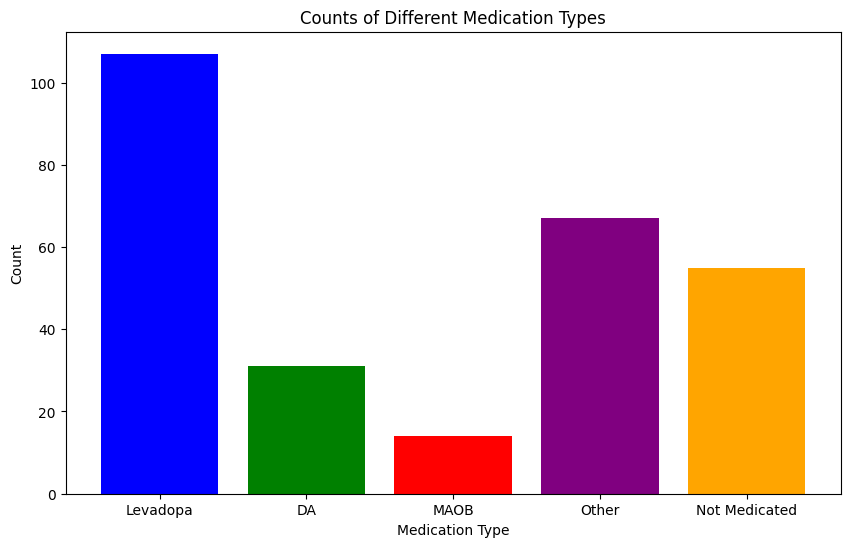

In [22]:
# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(counts.keys(), counts.values(), color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Medication Type')
plt.ylabel('Count')
plt.title('Counts of Different Medication Types')
plt.show()

In [ ]:
Levadopa = big_data.query("Levadopa == True")
DA = big_data.query("DA == True")
MAOB = big_data.query("MAOB == True")
other = big_data.query("Other == True")
not_medicated = big_data.query("Parkinsons == True and Medicated == False")

Levadopa_stats = Levadopa[['hold_time', 'flight_time', 'latency']].mean()
DA_stats = DA[['hold_time', 'flight_time', 'latency']].mean()
MAOB_stats = MAOB[['hold_time', 'flight_time', 'latency']].mean()
other_stats = other[['hold_time', 'flight_time', 'latency']].mean()
not_medicated_stats = not_medicated[['hold_time', 'flight_time', 'latency']].mean()

drugs_dataframe = pd.concat([Levadopa_stats, DA_stats, MAOB_stats, other_stats, not_medicated_stats], axis=1)
drugs_dataframe.columns = ['Levadopa', 'DA', 'MAOB', 'Other', 'Not Medicated']
drugs_dataframe.head()

,Levadopa,DA,MAOB,Other,Not Medicated
hold_time,128.344779,100.564381,117.550578,130.426794,103.706316
flight_time,210.855986,163.251469,165.103838,207.712815,166.401943
latency,283.965426,229.878445,254.343723,278.121287,240.504995


In [26]:
parkinsons_data = big_data.query("Parkinsons == True")
non_parkinsons_data = big_data.query("Parkinsons == False")

mean_latency_parkinsons = parkinsons_data['latency'].mean()
mean_latency_non_parkinsons = non_parkinsons_data['latency'].mean()

# Calculate the median latency
median_latency_parkinsons = parkinsons_data['latency'].median()
median_latency_non_parkinsons = non_parkinsons_data['latency'].median()

# Display the result
print(f"Mean Latency (Parkinson's): {mean_latency_parkinsons:.2f} ms")
print(f"Mean Latency (Non-Parkinson's): {mean_latency_non_parkinsons:.2f} ms")

print(f"Median Latency (Parkinson's): {median_latency_parkinsons:.2f} ms")
print(f"Median Latency (Non-Parkinson's): {median_latency_non_parkinsons:.2f} ms")

Mean Latency (Parkinson's): 263.68 ms
Mean Latency (Non-Parkinson's): 250.50 ms
Median Latency (Parkinson's): 234.40 ms
Median Latency (Non-Parkinson's): 218.80 ms


the data is probably very right skewed
similar to https://humanbenchmark.com/tests/reactiontime/statistics

the other visuals were omitted or deleted sorry